# Inverse Birch-Murnaghan equation with spline interpolation

How to cite: S.-H. Shim (2022) Inverse Birch-Murnaghan equation with spline interpolation.

In `pytheos` and also other apps, such as `dioptas` and `burnman`, to get volume for given pressure, root search is used.  

However, for extremely incompressible or compressible materials, root search can fail.

In the notebook below, we set up calibration function based on spline interpolation. the function takes the following form:

$$V = f(P)$$

Therefore, it becomes very easy to calculate volume from presssure.

Ref: https://en.wikipedia.org/wiki/Spline_(mathematics)

In [1]:
import pytheos as eos
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
%config InlineBackend.figure_format='retina'

## Physical parameters

Find challenging ones which crashes root search options.

In [3]:
v0 = 10.
k0 = 0.1
k0p = 20.
p_max = 1000.

## Construct spline calibration function

In [4]:
n_pts = 110
p_calib = np.linspace(-100, p_max, n_pts)
v_calib = eos.bm3_v(p_calib, v0, k0, k0p)
bm3s_v = interpolate.InterpolatedUnivariateSpline(p_calib, v_calib)


Text(0, 0.5, '$V / V_0 $')

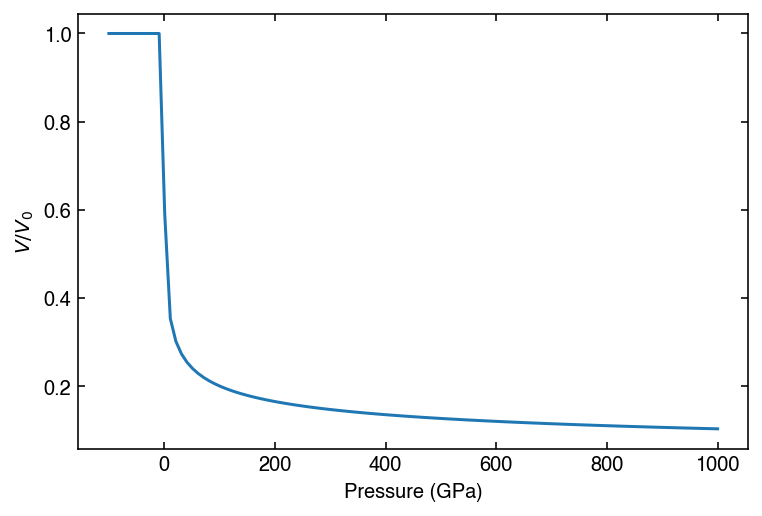

In [5]:
plt.plot(p_calib, v_calib/v0)
plt.xlabel('Pressure (GPa)'); plt.ylabel('$V / V_0 $')

## Performance check

Text(0, 0.5, '$\\Delta$V / V')

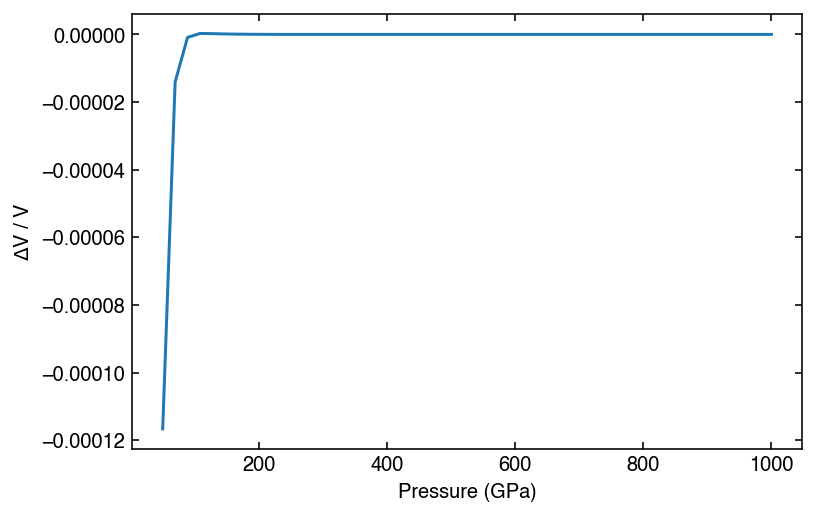

In [6]:
n_test = 50
p_test = np.linspace(50, p_max, n_test)

v_test = eos.bm3_v(p_test, v0, k0, k0p)
plt.plot(p_test, (v_test-bm3s_v(p_test))/v_test)
plt.xlabel('Pressure (GPa)')
plt.ylabel('$\Delta$V / V')

In general the perfomance is impressive.  However, the most problematic pressure range is near 0 GPa.

## Do not attempt ambitious extrapolation

In [7]:
bm3s_v(2000.) - eos.bm3_v(2000., v0, k0, k0p)

-0.07202342260049788

So the best way is to setup calibration function between 0 and 1000 GPa.  For the range where you can get a solution, do not use this approach.  This can fail particularly at low pressure range.  This is more useful at high pressure range where root search can fail.

Note that 1000 GPa is from the fact that most static compression experiments are performed at much lower pressure in most experiments.